### Question 1

1. Given the data in ‘FB_20141126.mat’, perform data analysis on it. Your description should include the following points:
    - Midprice
    - Microprice
    - Spread
    - Volume Imbalance.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io as sio
import seaborn as sns
import matplotlib.dates as mdates

In [30]:
data = sio.loadmat('data/FB_20141126')
LOB = data['LOB']
t = ((np.array((LOB['EventTime'][0][0][:,0])) - 3600000*9.5)*1e-3)
bid = np.array(LOB['BuyPrice'][0][0][:,0]*1e-4)
ask = np.array(LOB['SellPrice'][0][0][:,0]*1e-4)
askVolume = np.array(LOB['SellVolume'][0][0][:,0])
bidVolume = np.array(LOB['BuyVolume'][0][0][:,0])
# numberMO = np.array(LOB['NumberMO'][0][0][:,0])
# volumeMO = np.array(LOB['VolumeMO'][0][0][:,0])
# mo = np.array(LOB['MO'][0][0][:,0])
a = [bid, ask, bidVolume, askVolume]
columns = ['bid', 'ask', 'askVolume', 'bidVolume']

In [31]:
# Composition of the pandas data frame

DATA = pd.DataFrame(
    data = np.transpose(a),
    index = t,
    columns = columns)
DATA['mid'] = (DATA['bid'] + DATA['ask'])/2
DATA['spread'] = DATA['ask'] - DATA['bid']
DATA['microprice'] = (DATA['ask']*DATA['bidVolume'] + DATA['bid']*DATA['askVolume'])/(DATA['askVolume'] + DATA['bidVolume'])
DATA['imbalance'] = (DATA['askVolume'] - DATA['bidVolume'])/(DATA['askVolume'] + DATA['bidVolume'])
DATA

,bid,ask,askVolume,bidVolume,mid,spread,microprice,imbalance
0.1,75.47,75.50,1600.0,105.0,75.485,0.03,75.471848,0.876833
0.2,75.47,75.50,1600.0,105.0,75.485,0.03,75.471848,0.876833
0.3,75.50,75.51,500.0,100.0,75.505,0.01,75.501667,0.666667
0.4,75.51,75.53,100.0,1000.0,75.520,0.02,75.528182,-0.818182
0.5,75.51,75.53,100.0,1000.0,75.520,0.02,75.528182,-0.818182
...,...,...,...,...,...,...,...,...
23399.6,77.63,77.64,5148.0,9800.0,77.635,0.01,77.636556,-0.311212
23399.7,77.63,77.64,5148.0,9800.0,77.635,0.01,77.636556,-0.311212
23399.8,77.63,77.64,5148.0,12600.0,77.635,0.01,77.637099,-0.419878
23399.9,77.63,77.64,5148.0,12600.0,77.635,0.01,77.637099,-0.419878


In [32]:
DATA.describe()

,bid,ask,askVolume,bidVolume,mid,spread,microprice,imbalance
count,234000.000000,234000.000000,234000.000000,234000.000000,234000.000000,234000.000000,234000.000000,234000.000000
mean,77.232052,77.242788,1359.962825,2629.419791,77.237420,0.010736,77.237668,-0.049366
std,0.498169,0.497539,1078.297717,14771.684632,0.497852,0.002859,0.497983,0.489329
min,75.470000,75.500000,1.000000,1.000000,75.485000,0.010000,75.471848,-0.999328
25%,77.100000,77.110000,700.000000,701.000000,77.105000,0.010000,77.108125,-0.436778
50%,77.400000,77.410000,1200.000000,1250.000000,77.405000,0.010000,77.403185,-0.062500
75%,77.590000,77.600000,1708.000000,1907.000000,77.595000,0.010000,77.592447,0.331558
max,77.770000,77.790000,28206.000000,297450.000000,77.780000,0.060000,77.784344,0.999498


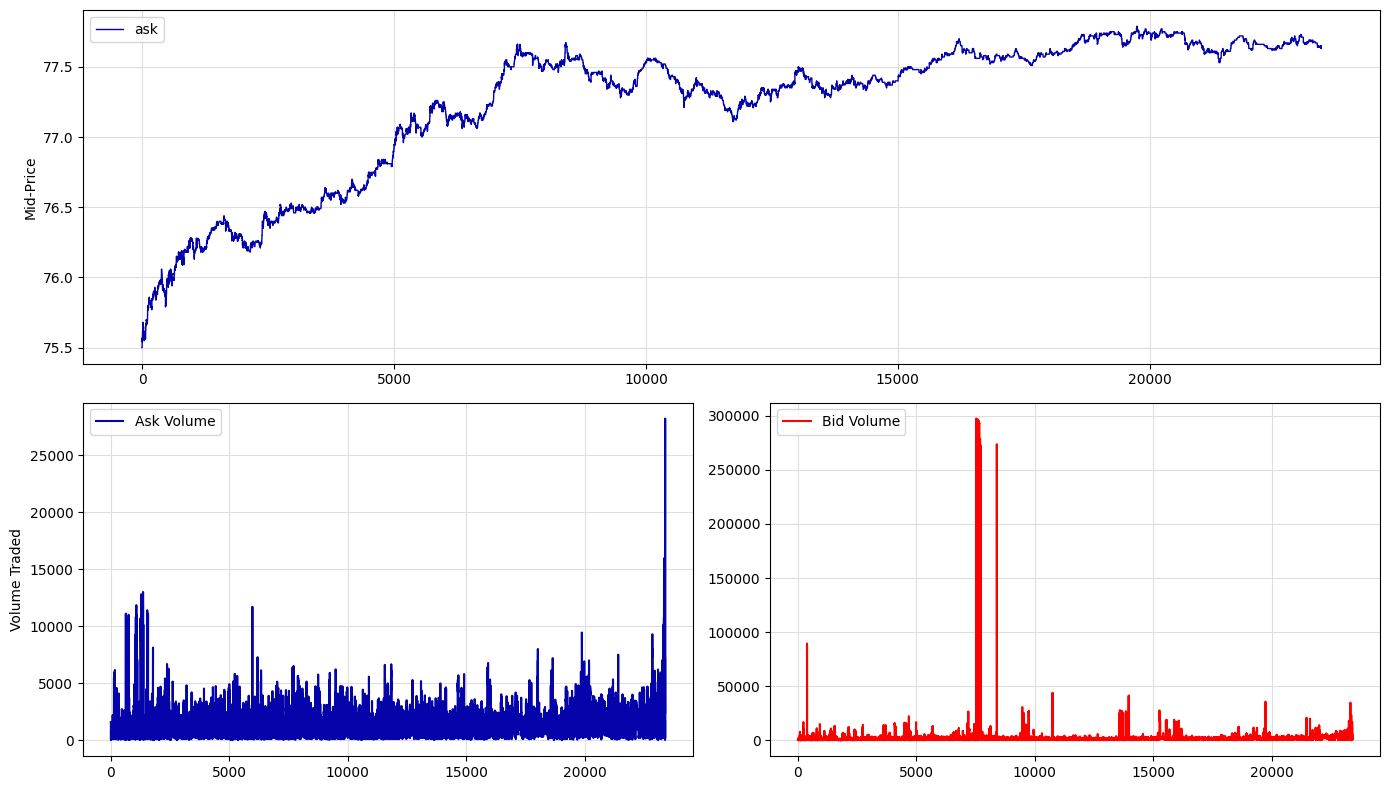

In [80]:
fig = plt.figure(figsize=(14, 8))

# Top chart: Mid-Price spanning the first row
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1.plot(DATA.index, DATA['ask'], color='#0504aa', linewidth=1)
# ax1.plot(DATA.index, DATA['bid'], color='red', linewidth=0.5, linestyle='--')
ax1.set_ylabel('Mid-Price')
ax1.legend(['ask', 'bid'], loc='upper left')
ax1.grid(True, color="#dedede")

# Bottom left chart: Ask Volume
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax2.plot(DATA.index, DATA['askVolume'], label='Ask Volume', color='#0504aa')
ax2.set_ylabel('Volume Traded')
ax2.legend(['Ask Volume'], loc='upper left')
ax2.grid(True, color="#dedede")

# Bottom right chart: Bid Volume
ax3 = plt.subplot2grid((2, 2), (1, 1))
ax3.plot(DATA.index, DATA['bidVolume'], label='Bid Volume', color='red')
ax3.legend(['Bid Volume'], loc='upper left')
ax3.grid(True, color="#dedede")

# Adjusting the layout
plt.tight_layout()

# Show plot
plt.show()

Text(0.5, 1.0, 'Mid-Price Boxplot')

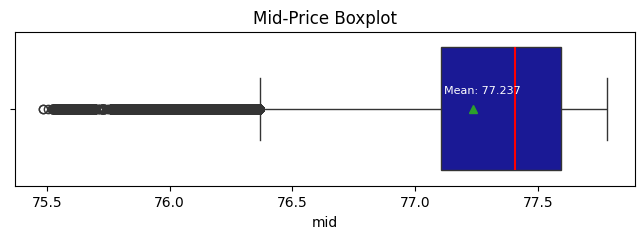

In [68]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=DATA, x='mid', orient='h', color='#0504aa',
            showmeans=True,
            medianprops={"color": "red", "ls": "-", "lw": 1.5})

# Add label to the mean price
mean_price = DATA['mid'].mean()
plt.text(mean_price-0.12, -0.1, f'Mean: {mean_price:.3f}', color='white', fontsize=8)

plt.title('Mid-Price Boxplot')

Text(0.5, 1.0, 'Micro-Price Boxplot')

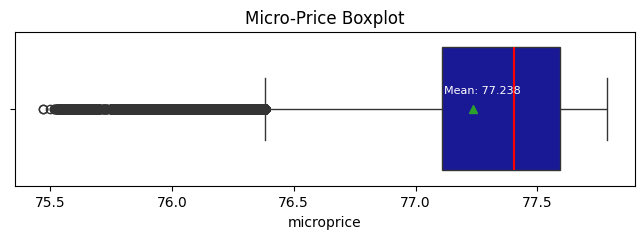

In [69]:
plt.figure(figsize=(8, 2))
sns.boxplot(data=DATA, x='microprice', orient='h', color='#0504aa',
            showmeans=True,
            medianprops={"color": "red", "ls": "-", "lw": 1.5})

# Add label to the mean price
mean_price = DATA['microprice'].mean()
plt.text(mean_price-0.12, -0.1, f'Mean: {mean_price:.3f}', color='white', fontsize=8)

plt.title('Micro-Price Boxplot')

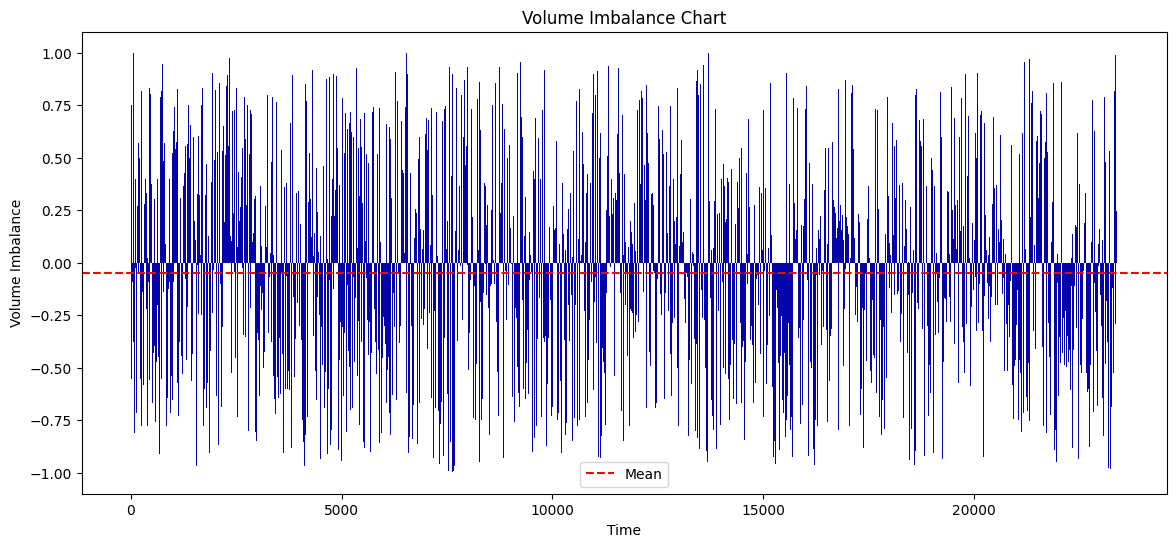

In [82]:
plt.figure(figsize=(14, 6))
plt.bar(DATA.index, DATA['imbalance'], color='#0504aa')
plt.xlabel('Time')
plt.ylabel('Volume Imbalance')
plt.title('Volume Imbalance Chart')
plt.axhline(DATA['imbalance'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.show()
